## Announcements

* Lab 01 Due Saturday Midnight (October 10th)
* Project 01 will be released Monday (Checkpoint next Monday, October 12th; Due two weeks: October 19th)
* Coding Style
* "No loops" on the Labs/Projects

# Tabular Data

## Outline

* Intro to Pandas
    - Series / Dataframe / Indices
    - Basic Operations
* For loops and Numpy 
* Pandas and Numpy: performance and memory management
* Useful Pandas Methods

# 2. Intro to Pandas


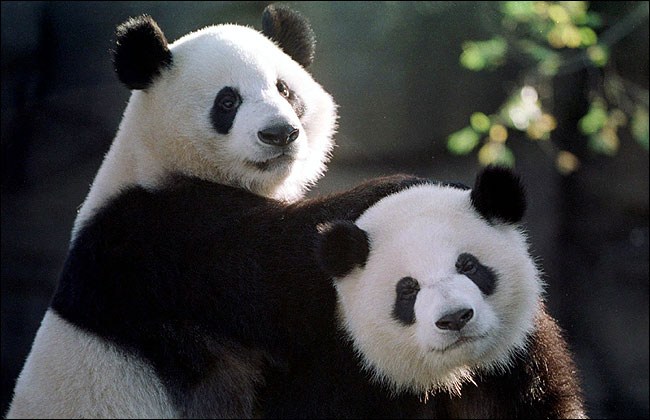

# Pandas
* Python library for reading "Panel Data"  (originally by Wes McKinney)
* Similar to `data.table` in `R`; `dataframe` in `spark`.

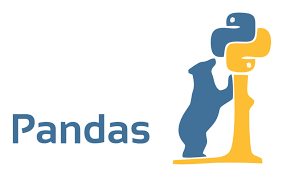

### Pandas History

* Old workflow: Use multiple languages (python, R, java) in single project.
* New workflow: Do everything in python! (Wes McKinney)
    - Faster to develop than java;
    - More production capable than R


### Pandas History

* Pandas was created to fill a gap in data manipulation capabilities.
    - Hodgepodge of features of other succesful libraries (e.g. from `R`)
    - Ad-hoc, still evolving design.
    - Great for prototyping.

## Pandas Data Structures:
1. Data Frame: 2 dimensional tables
2. Series: 1 dimensional (columnar) array
3. Index: immutable sequence of column/row labels

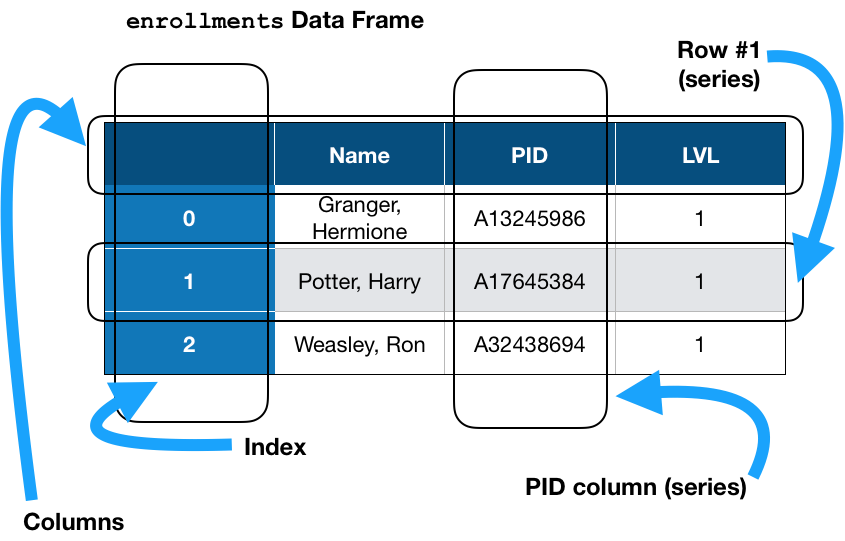

### Importing Pandas (and related libraries)

In [37]:
%matplotlib inline  
import pandas as pd
import numpy as np
import os         

## 1-dimensional slices of tables
* Rows and columns of data frames are represented by `pd.Series`.
* A `pd.Series` object is a one-dimensional with labels (index).
* Optional (default) arguments:
    - `index` (does not have to be numeric),  `name`

In [38]:
row_data = pd.Series([10, 23, 45, 53, 87])
row_data
# positional location

0    10
1    23
2    45
3    53
4    87
dtype: int64

In [39]:
# pass the dictionary
row_data = pd.Series({'a': 10, 'b': 23, 'c': 45, 'd': 53, 'e': 87})
row_data

a    10
b    23
c    45
d    53
e    87
dtype: int64

# `DataFrame` Constructor

* `pd.DataFrame` creates a data frame from: 
    - a list of rows
    - a dictionary of columns
* Optional (default) arguments:
    - `index`, `columns`, `dtype`

In [40]:
row_data = [
    ['Granger, Hermione', 'A13245986', 1],
    ['Potter, Harry', 'A17645384', 1],
    ['Weasley, Ron', 'A32438694', 1],
    ['Longbottom, Neville', 'A52342436', 1]
]

row_data

[['Granger, Hermione', 'A13245986', 1],
 ['Potter, Harry', 'A17645384', 1],
 ['Weasley, Ron', 'A32438694', 1],
 ['Longbottom, Neville', 'A52342436', 1]]

In [43]:
enrollments = pd.DataFrame(row_data, columns = ['Name', 'PID', 'LVL'])
enrollments

,Name,PID,LVL
0,"Granger, Hermione",A13245986,1
1,"Potter, Harry",A17645384,1
2,"Weasley, Ron",A32438694,1
3,"Longbottom, Neville",A52342436,1


In [44]:
# dictionary of lists
column_dict = {
    'Name': ['Granger, Hermione', 'Potter, Harry', 'Weasley, Ron', 'Longbottom, Neville'],
    'PID': ['A13245986', 'A17645384', 'A32438694', 'A52342436'],
    'LVL': [1, 1, 1, 1]
}
column_dict

{'Name': ['Granger, Hermione',
  'Potter, Harry',
  'Weasley, Ron',
  'Longbottom, Neville'],
 'PID': ['A13245986', 'A17645384', 'A32438694', 'A52342436'],
 'LVL': [1, 1, 1, 1]}

In [45]:
enrollments = pd.DataFrame(column_dict)
enrollments

,Name,PID,LVL
0,"Granger, Hermione",A13245986,1
1,"Potter, Harry",A17645384,1
2,"Weasley, Ron",A32438694,1
3,"Longbottom, Neville",A52342436,1


### `DataFrame` index and column labels
* column labels accessed using the `columns` attribute
* index labels accessed using the `index` attribute.
* index/columns default to column number (0-indexed)

In [46]:
enrollments.columns

Index(['Name', 'PID', 'LVL'], dtype='object')

In [47]:
enrollments.index

RangeIndex(start=0, stop=4, step=1)

## Axis 

The rows and columns of a `pd.DataFrame` are both `pd.Series`.

The *axis* specifies the direction of a slice of a table.

* A slice along the:
    - 0-axis is a Series labeled by the *row* index of the dataframe. (column-wise)
    - 1-axis is a Series labeled by the *columns* (index) of the dataframe. (row-wise)


In [48]:
ax = pd.DataFrame([[2, 4]],columns=list('AB'))
ax

,A,B
0,2,4


In [49]:
# what will you get?

ax.mean(axis = 1)


0    3.0
dtype: float64

In [50]:
ax.mean()


A    2.0
B    4.0
dtype: float64

* Axis 0 will act on all the ROWS in each COLUMN
* Axis 1 will act on all the COLUMNS in each ROW

In [51]:
ax2 = pd.DataFrame([[2, 4], [6, 8]],columns=list('AB'))
ax2

,A,B
0,2,4
1,6,8


In [52]:
ax2.mean()


A    4.0
B    6.0
dtype: float64

In [53]:
ax2.mean(axis = 1)


0    3.0
1    7.0
dtype: float64

# Selecting Rows and Columns with `[]` and `loc`

### Selecting columns of a `DataFrame` using `[]`
* Access a column using the `[]` operator
    - A `DataFrame` is roughly a `dict` of arrays!
* Specifying a column name returns the column as a series (an `axis=0` slice).
* Specifying a list of column names returns a data frame.

In [54]:
enrollments

,Name,PID,LVL
0,"Granger, Hermione",A13245986,1
1,"Potter, Harry",A17645384,1
2,"Weasley, Ron",A32438694,1
3,"Longbottom, Neville",A52342436,1


In [55]:
# returns series
# 1 dim slice

enrollments['Name']

0      Granger, Hermione
1          Potter, Harry
2           Weasley, Ron
3    Longbottom, Neville
Name: Name, dtype: object

In [56]:
# returns a data frame

enrollments[['Name', 'PID']]

,Name,PID
0,"Granger, Hermione",A13245986
1,"Potter, Harry",A17645384
2,"Weasley, Ron",A32438694
3,"Longbottom, Neville",A52342436


In [57]:
# What is the output? Table or array?

enrollments[['Name']]

,Name
0,"Granger, Hermione"
1,"Potter, Harry"
2,"Weasley, Ron"
3,"Longbottom, Neville"


## Selecting rows with `loc`
* `DataFrame.loc[idx]` returns a Series describing of a single row.
* `DataFrame.loc[idx_list]` returns a DataFrame with rows given by `idx_list`

In [58]:
enrollments

,Name,PID,LVL
0,"Granger, Hermione",A13245986,1
1,"Potter, Harry",A17645384,1
2,"Weasley, Ron",A32438694,1
3,"Longbottom, Neville",A52342436,1


In [59]:
enrollments.loc[3]

Name    Longbottom, Neville
PID               A52342436
LVL                       1
Name: 3, dtype: object

In [60]:
enrollments.loc[[1,3]]

,Name,PID,LVL
1,"Potter, Harry",A17645384,1
3,"Longbottom, Neville",A52342436,1


In [61]:
enrollments.loc[[3]]

,Name,PID,LVL
3,"Longbottom, Neville",A52342436,1


## Boolean Array Selection

* The `loc` operator also supports boolean arrays as input. 
* The array must be exactly as long as the number of rows. 
* The result is a filtered data frame, where only rows corresponding to `True` appear.

In [62]:
enrollments

,Name,PID,LVL
0,"Granger, Hermione",A13245986,1
1,"Potter, Harry",A17645384,1
2,"Weasley, Ron",A32438694,1
3,"Longbottom, Neville",A52342436,1


In [63]:
bool_arr = [
    False,  # Hermione
    True,   # Harry
    False,  # Ron
    True    # Neville
]

enrollments.loc[bool_arr]

,Name,PID,LVL
1,"Potter, Harry",A17645384,1
3,"Longbottom, Neville",A52342436,1


### Boolean arrays via conditions
* Select all Hogwarts whose last names begin with A-L

In [64]:
enrollments

,Name,PID,LVL
0,"Granger, Hermione",A13245986,1
1,"Potter, Harry",A17645384,1
2,"Weasley, Ron",A32438694,1
3,"Longbottom, Neville",A52342436,1


In [65]:
# numpy arrays:

n = np.array([1, 2, 3, 4, 5, 6])
n < 4

array([ True,  True,  True, False, False, False])

In [66]:
enrollments['Name']

0      Granger, Hermione
1          Potter, Harry
2           Weasley, Ron
3    Longbottom, Neville
Name: Name, dtype: object

In [67]:
bool_arr = enrollments['Name'] < 'M'
bool_arr

0     True
1    False
2    False
3     True
Name: Name, dtype: bool

In [68]:
enrollments.loc[bool_arr]

,Name,PID,LVL
0,"Granger, Hermione",A13245986,1
3,"Longbottom, Neville",A52342436,1


### Selecting groups of rows and columns of a `DataFrame`.
* `DataFrame.loc[idx_list, col_list]` selects rows in `idx_list` and columns in `col_list`.
* `DataFrame.loc[bool_arr, col_list]` selects rows using `bool_arr` and columns in `col_list`.
* Use `DataFrame.loc[:,col_list]` to select all rows.

### Other ways of selecting rows and columns
* `loc[bool_arr, bool_arr]` selects both rows and columns using boolean arrays.
* `loc[predicate]` where `predicate` is a function with boolean output.
* `loc[:,colname_i:colname_j]` column name slicing
* `loc[idx, col]` selects the entry in row `idx` and column `col`.
* `iloc[,]` selects rows/columns by the 'positional index'.


See the documentation for more!

### Discussion Questions

For the data frame given below, what do each of the following return?

|1|2|
|---|---|
|`jack[1]`|`jack.loc[1]`|
|`jack[[1]]`|`jack.loc[jack[1] == 'fo']`|
|`jack['1']`|`jack.loc[1,['1', 1]]`|
|`jack[[1,1]]`|`jack.loc[1,1]`|


In [79]:
jack = pd.DataFrame({1: ['fee', 'fi'], '1': ['fo', 'fum']})
jack

,1,1
0,fee,fo
1,fi,fum


In [81]:
#jack[1]
#jack['1']
#jack[[1]]
#jack[[1,1]]
#jack.loc[1]
#jack.loc[jack[1] == 'fo']
jack.loc[1, ['1', 1]]
jack.loc[1,1]

'fi'

# Pandas and NumPy

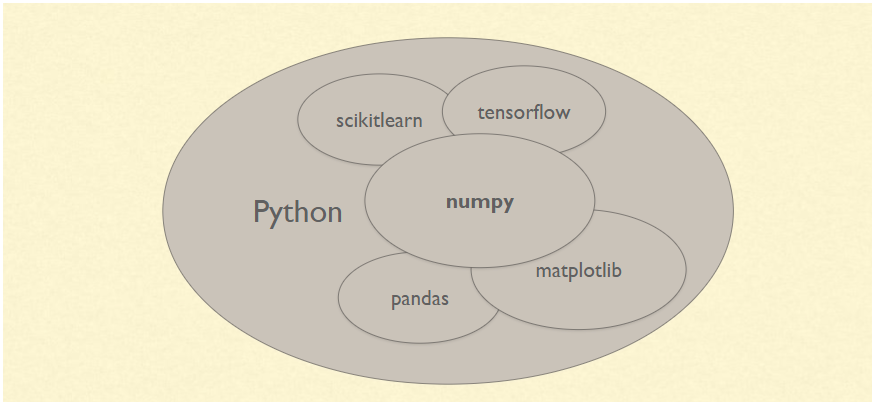

## NumPy

- It is an open source module of Python which provides **fast** mathematical computation on arrays and matrices.
- `NumPy`’s main object is the homogeneous multidimensional array.
    - A single column (typically),
    - A table with a single type (ints, floats, or string).
- `NumPy` provides convenient and optimized C-implementations of essential mathematical operations on vectors.
- [Good overview](https://cloudxlab.com/blog/numpy-pandas-introduction/)

## `Pandas` is built upon `NumPy`

* Pandas Series are Numpy arrays with user-defined indices.
* DataFrames are roughly dictionaries of columns (each a homogeneous Numpy array).
* `Pandas` uses fast `NumPy` operations whenever possible (e.g. column operations).
* To access the underlying numpy array of a DataFrame/Series use `.values` attribute.
    - Hard to predict what is returned: copy or direct access

In [ ]:
arr = np.array([0,1,2,3])
ser = pd.Series([0,1,2,3], index='a b c d'.split())

In [ ]:
arr

In [ ]:
ser

In [ ]:
ser.values

## Danger of the for loops

* 'for loops' have slow execution when processing large datasets.
* Let's compute the distance between the origin (0, 0) and 2000 random points in $\mathbb{R}^2$:
    - By looping through the rows of the table,
    - By using vectorized arithmetic.

In [ ]:
N = 2000 # Number of records to process
x_list = list(100*(np.random.random(N))+1)
y_list = list(100*(np.random.random(N))+1)

coordinates = pd.DataFrame({"x": x_list, "y": y_list})
coordinates.head()

In [ ]:
# Define a function to manually loop over all rows and return a series of distances

def distances(df):
    hyp_list = []
    for i in df.index:
        dist = (df.loc[i]['x']**2 + df.loc[i]['y']**2)**0.5
        hyp_list.append(dist)
    return hyp_list

In [ ]:
%timeit distances(coordinates)

In [ ]:
%timeit (coordinates['x']**2 + coordinates['y']**2)**0.5

### Pandas data types

* Understanding data types in Pandas:
    - Leads to better memory and time performance!
    - Avoids hard-to-spot computational errors!
* Pandas tries to guess the correct data-type (and is often wrong!)
* You will often need to explicitly convert between data types.

### Data types

* A Pandas **Data Type** is a classification that specifies the type of values in a column.
* A column's data type determines which operations can be applied to it.
* What data types do you know?

### Pandas data types

|Pandas dtype|Python type|NumPy type|SQL type|Usage|
|---|---|---|---|---|
|object|NA|object|NA|Mixed types|
|object|str|string, unicode|NA|Text|
|int64|int|int_, int8,...,int64, uint8,...,uint64|INT, BIGINT| Integer numbers|
|float64|float|float_, float16, float32, float64|FLOAT| Floating point numbers|
|bool|bool|bool_|BOOL|True/False values|
|datetime64|NA|datetime64[ns]|DATETIME|Date and time values|
|timedelta[ns]|NA|NA|NA|Differences between two datetimes|
|category|NA|NA|ENUM|Finite list of text values|

### Very useful article

https://www.dataquest.io/blog/pandas-big-data/

### Type conversion and the underlying `NumPy` array(s)
* `.dtypes` method give the data type of each column.
* `.values` on a column return an array of data type in `.dtypes`.
* `.values` on the dataframe gives an array of mixed type (`object`) -- unless homogeneous

In [ ]:
# Read in file
elections_fp = os.path.join('data', 'elections.csv')
elections = pd.read_csv(elections_fp)
elections.head()

In [ ]:
elections.dtypes

In [ ]:
elections['%'].values

In [ ]:
elections['%'].values.dtype

In [ ]:
elections.values

### Caution on conversion of `dtypes`: 

* `NumPy` and `Pandas` don't always guess dtype the same way!
* `Numpy` coerces dtype to optimize memory and read/write speed
* `Pandas` optimizes for "ease of development"

In [ ]:
# Numpy likes homogeneous data types for space/speed

np.array(['a', 1])

In [ ]:
# Pandas likes correctness and ease of use

pd.Series(['a', 1])

In [ ]:
pd.Series(['a', 1]).values

In [ ]:
np.array(['a', 1], dtype=np.object)

In [ ]:
# Pandas makes a few trade-offs for efficiency
pd.Series([1, 1.0])

# Pandas performance and memory management


## `NumPy` vs `Pandas`

* NumPy is optimized for speed and memory consumption
* Pandas makes implementation choices that: 
    - are slow and use a lot of memory,
    - optimize for fast code development.

In [ ]:
ser1 = pd.Series(np.array(range(10**6)), dtype=np.int8).to_frame()
ser2 = pd.Series(range(10**6)).to_frame()

In [ ]:
ser1

In [ ]:
ser1.info()

In [ ]:
ser2.info()

In [ ]:
# what is this?
arr = np.array(['a'*80]*100)
ser = pd.Series(arr)

In [ ]:
ser

In [ ]:
arr.dtype, ser.dtype

In [ ]:
%timeit arr.transpose()

In [ ]:
%timeit ser.transpose()

### Pandas Performance and Memory Management

* Pandas encourages writing 'data processing pipelines':
    - fit together the output of one method to the input of the next method.
    - requires that methods return a *copy*.
* NumPy often works in-place; Pandas **usually** copies the underlying array before transforming it!
    - See [Copies vs Views](https://afraenkel.github.io/practical-data-science/02/data-types.html#copies-and-views-in-pandas).

# Useful `pd.Series` and `pd.DataFrame` methods

### Shared methods and attributes
* `head`/`tail` methods displays the first/last few rows.
* `shape` attribute returns number of rows/columns.
* `size` attribute returns the number of entries.

In [ ]:
elections.tail(7)

In [ ]:
elections.shape

In [ ]:
elections.size

### `pd.Series` methods  (understanding descriptive statistics)

|Method Name|Description|
|---|---|
|`count`|Count the number of non-null entries of a Series|
|`unique`|Returns unique values of Series object|
|`nunique`|Returns number of unique values of Series object|
|`value_counts`|Returns Series of counts of unique values|
|`describe`|Returns Series of descriptive stats of values|

In [ ]:
# distinct election years
elections['Candidate'].unique()

In [ ]:
# number of distinct Candidates
elections['Candidate'].nunique()

In [ ]:
# number of candidates in elections
elections['Candidate'].count()

In [ ]:
elections

In [ ]:
# explain the output
# distribution (after normalization) of a column

republicans = elections[elections['Party'] == 'Republican']
republicans['Result'].value_counts().to_frame()

In [ ]:
# to get quantitative information
republicans['%'].describe()

### `pd.DataFrame` methods

* DataFrames share *many* of the same methods with Series.
    - The dataFrame method applies the Series method to every row/column.
* Some of these methods take the `axis` keyword argument:
    - `axis=0`: the method is applied to series with index given by rows.
    - `axis=1`: the method is applied to series with index given by columns.
* Default value: `axis=0` (apply method to each column).

In [ ]:
elections.head()

In [ ]:
elections[['%', 'Year']].mean(axis=0)

In [ ]:
# doesn't make sense! why?
elections[['%', 'Year']].mean(axis=1)

### `pd.DataFrame` methods

|Method Name|Description|
|---|---|
|`sort_values`|Returns a DataFrame sorted by specified column|
|`drop_duplicates`|Returns a DataFrame with duplicate values dropped|
|`describe`|Returns descriptive stats of the data|

In [ ]:
elections.sort_values('%', ascending=False).head(10)

In [ ]:
# by default use all of the columns

elections.drop_duplicates(subset=['Candidate'])

## Adding and Modifying Columns (method chaining)

* Assign a new column of a DataFrame using `assign` method.
* Assign a new row with `append`.
* Both return a copy of the DataFrame (great feature!)
* Re-assign an existing column to change the value.

In [ ]:
#copy
(
    elections
    .assign(proportion_of_vote = (elections['%'] / 100))
    .head()
)

In [ ]:
elections

In [ ]:
# chain together multiple steps
(
    elections
    .assign(proportion_of_vote=(elections['%'] / 100))
    .assign(Result=elections['Result'].str.upper())
    .head()
)

In [ ]:
# try to have spaces in the column name
(
    elections
    .assign(proportion of vote = (elections['%'] / 100))
    .head()
)

In [ ]:
# If a column name has spaces -- use keyword arguments
# **kwargs  (https://realpython.com/python-kwargs-and-args/)

(
    elections
    .assign(**{'Proportion of Vote':(elections['%'] / 100)})
    .head()
)

## Adding and Modifying Columns (existing modification)

* Assign a new row/column of a dataframe using `loc` or `[]`
    - Works like dictionary assignment.
* Re-assign an existing row/column to change the value.
* Changes the value of existing variables (careful!)

In [ ]:
# deep or shallow?
# what is the difference?

mod_elec = elections.copy()
mod_elec.head()

In [ ]:
mod_elec['Proportion of Vote'] = mod_elec['%'] / 100
mod_elec.head()

In [ ]:
mod_elec['Result'] = mod_elec['Result'].str.upper()
mod_elec.head()

In [ ]:
# predict the output

mod_elec.loc[-1, :] = ['Carter', 'Democratic', 50.1, 1976, 'WIN', 0.501]
mod_elec.loc[-2, :] = ['Ford', 'Republican', 48.0, 1976, 'LOSS', 0.48]
mod_elec

In [ ]:
mod_elec = mod_elec.sort_index()
mod_elec.head()

In [ ]:
# df.reset_index(drop=True) drops the current index 
# of the DataFrame and replaces it with an index of increasing integers


mod_elec.reset_index(drop=True)

## Example: city of SD employee salaries
* Read data from web
* Look at dataframe basics

In [ ]:
salaries = pd.read_csv('https://transcal.s3.amazonaws.com/public/export/san-diego-2017.csv')

In [ ]:
salaries.head()

In [ ]:
salaries.info()

## Light cleaning
* Fix: `Other Pay` column non-numeric
* Drop useless columns (all one value)

In [ ]:
salaries['Other Pay'].dtype

In [ ]:
# which rows don't contain a decimal?
salaries.loc[salaries['Other Pay'].str.contains('.00') == False]

In [ ]:
# filter out non-numeric entries
salaries = salaries.loc[salaries['Other Pay'].str.contains('.00') == True]
salaries

In [ ]:
# convert to float
salaries['Other Pay'] = salaries['Other Pay'].astype(float)

In [ ]:
# drop useless columns
salaries = salaries.drop(['Year', 'Notes', 'Agency'], axis=1)
salaries.head()

In [ ]:
# proportion of jobs that are FT/PT
# If True then the object returned will contain the relative frequencies of the unique values.


salaries['Status'].value_counts(normalize=True)

In [ ]:
# Salary Statistics
salaries.describe()

In [ ]:
# are component pays equal to total pay?
# all: Return whether all elements are True,


(salaries.loc[:, ['Base Pay', 'Overtime Pay', 'Other Pay']].sum(axis=1) == salaries.loc[:,'Total Pay']).all()

In [ ]:
# is total pay plus benefits equal to total pay & benefits column?
(salaries.loc[:, ['Total Pay', 'Benefits']].sum(axis=1) == salaries.loc[:, 'Total Pay & Benefits']).all()

In [ ]:
salaries['Total Pay & Benefits'].plot(kind='hist', bins=10);

In [ ]:
salaries.plot(kind='scatter', x='Base Pay', y='Overtime Pay')

In [ ]:
pd.plotting.scatter_matrix(salaries[['Base Pay', 'Overtime Pay', 'Total Pay']], figsize=(8,8));

In [ ]:
# who makes a lot of overtime?
salaries.loc[salaries['Overtime Pay'] > 100000]